In [1]:
## references:
# https://www.ritchieng.com/pandas-scikit-learn/
# https://www.kaggle.com/timolee/a-home-for-pandas-and-sklearn-beginner-how-tos
import pandas as pd

df = pd.read_csv('P1training.csv', parse_dates=True, index_col=0)
# dependent variables aka response
y = df['Appliances']
# predictors
feature_cols = [col for col in df.columns if 'Appliances' not in col]
x = df[feature_cols]
print(x.head())
print(feature_cols)

                     lights     T1       RH_1    T2       RH_2     T3  \
date                                                                    
2016-01-11 17:00:00      30  19.89  47.596667  19.2  44.790000  19.79   
2016-01-11 17:10:00      30  19.89  46.693333  19.2  44.722500  19.79   
2016-01-11 17:20:00      30  19.89  46.300000  19.2  44.626667  19.79   
2016-01-11 17:40:00      40  19.89  46.333333  19.2  44.530000  19.79   
2016-01-11 17:50:00      40  19.89  46.026667  19.2  44.500000  19.79   

                          RH_3         T4       RH_4         T5    ...      \
date                                                               ...       
2016-01-11 17:00:00  44.730000  19.000000  45.566667  17.166667    ...       
2016-01-11 17:10:00  44.790000  19.000000  45.992500  17.166667    ...       
2016-01-11 17:20:00  44.933333  18.926667  45.890000  17.166667    ...       
2016-01-11 17:40:00  45.000000  18.890000  45.530000  17.200000    ...       
2016-01-11 17:50:00 

{'lights': 125.66487435181583, 'T1': 12.614376551581076, 'RH_1': 25.70312448853656, 'T2': 51.667068316958236, 'RH_2': 13.001073509841417, 'T3': 29.278489694406954, 'RH_3': 5.11527917040632, 'T4': 7.972750022286362, 'RH_4': 1.3242202223458253, 'T5': 2.255571807573618, 'RH_5': 0.32046600008807663, 'T6': 49.828814521581656, 'RH_6': 25.518016386150553, 'T7': 4.0863732492170275, 'RH_7': 11.15981444564585, 'T8': 7.535670466411153, 'RH_8': 29.4447081644904, 'T9': 1.347724787928244, 'RH_9': 9.009151725470517, 'T_out': 36.48758157075844, 'Press_mm_hg': 4.0546376783952125, 'RH_out': 79.46327750890532, 'Windspeed': 24.558129000587765, 'Visibility': 0.25161691650180046, 'Tdewpoint': 1.7669912100853202}


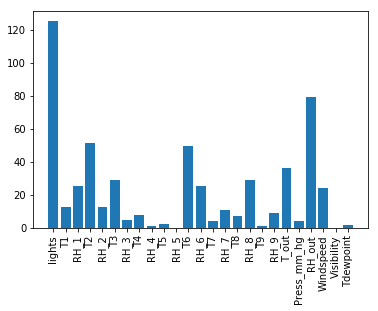

In [23]:
# feature selection use Univariate linear regression tests.
import numpy as np
import matplotlib.pyplot as plt
from sklearn.feature_selection import SelectKBest,f_regression
from sklearn import linear_model

#selecting features
selector = SelectKBest(score_func=f_regression, k=5)
fit = selector.fit(df[feature_cols], df['Appliances'])

# Get the raw p-values for each feature, and transform from p-values into scores
scores = -np.log10(selector.pvalues_)
pvalue_dict  = dict(zip(feature_cols, scores))
print(pvalue_dict)

# Plot the scores.
plt.bar(range(len(feature_cols)), scores)
plt.xticks(range(len(feature_cols)), feature_cols, rotation='vertical')
plt.show()



In [29]:
kbest_f_regress =list(df[feature_cols].columns[fit.get_support()])
print(kbest_f_regress)

['lights', 'T2', 'T6', 'T_out', 'RH_out']


In [37]:
from sklearn.feature_selection import RFECV, RFE
from sklearn.linear_model import LinearRegression
#feature selection using recursive feature elimination with cross validation
#http://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.RFECV.html
#instantiate a model
linear_reg = LinearRegression()
# Create recursive feature eliminator that scores features by mean squared errors
rfecv = RFECV(estimator=linear_reg, step=1, scoring='neg_mean_squared_error')

# Fit recursive feature eliminator 
rfecv.fit(df[feature_cols], df['Appliances'])

RFECV(cv=None,
   estimator=LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False),
   n_jobs=1, scoring='neg_mean_squared_error', step=1, verbose=0)

In [45]:
# Number of best features
print('Number of best features:', rfecv.n_features_)
rfecv_ranking = list(zip(feature_cols, rfecv.ranking_))
print(rfecv_ranking)

Number of best features: 11
[('lights', 2), ('T1', 3), ('RH_1', 1), ('T2', 1), ('RH_2', 1), ('T3', 1), ('RH_3', 1), ('T4', 1), ('RH_4', 12), ('T5', 8), ('RH_5', 14), ('T6', 1), ('RH_6', 11), ('T7', 6), ('RH_7', 5), ('T8', 1), ('RH_8', 1), ('T9', 1), ('RH_9', 9), ('T_out', 1), ('Press_mm_hg', 13), ('RH_out', 10), ('Windspeed', 4), ('Visibility', 15), ('Tdewpoint', 7)]


Features selected: RH_1 , T2 , RH_2 , T3 , RH_3 , T4 , T6 , T8 , RH_8 , T9 , T_out


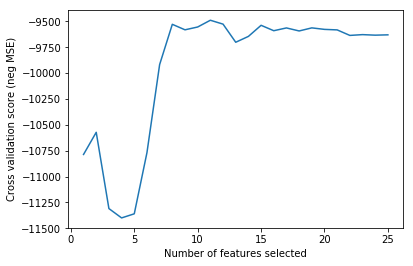

In [84]:
# List of features
rfecv_feats = list(df[feature_cols].columns[rfecv.get_support()])
print('Features selected:',' , '.join(rfecv_feats))
# Plot number of features VS. cross-validation scores
plt.figure()
plt.xlabel("Number of features selected")
plt.ylabel("Cross validation score (neg MSE)")
plt.plot(range(1, len(rfecv.grid_scores_) + 1), rfecv.grid_scores_)
plt.show()

In [43]:
# Recursive feature selection without cross validation

rfe = RFE(linear_reg, 5, step=1)
rfe.fit(df[feature_cols], df['Appliances'])
# List of features
rfe_feats = list(df[feature_cols].columns[rfe.get_support()])
ranking_dict = dict(zip(feature_cols, rfe.ranking_))
print('Features selected:',' , '.join(rfe_feats))
print("Num Features: {}".format(rfe.n_features_))
print("Feature Ranking:{}".format(ranking_dict))

Features selected: RH_1 , T2 , RH_2 , T3 , T9
Num Features: 5
Feature Ranking:{'lights': 8, 'T1': 9, 'RH_1': 1, 'T2': 1, 'RH_2': 1, 'T3': 1, 'RH_3': 4, 'T4': 7, 'RH_4': 18, 'T5': 14, 'RH_5': 20, 'T6': 5, 'RH_6': 17, 'T7': 12, 'RH_7': 11, 'T8': 2, 'RH_8': 3, 'T9': 1, 'RH_9': 15, 'T_out': 6, 'Press_mm_hg': 19, 'RH_out': 16, 'Windspeed': 10, 'Visibility': 21, 'Tdewpoint': 13}


In [68]:
import statsmodels.formula.api as smf
import statsmodels.api as sm
import heapq
from sklearn.model_selection import KFold
from operator import itemgetter
from sklearn.metrics import (explained_variance_score, mean_absolute_error,
                             mean_squared_error, r2_score)

def forward_selected(data, response, n):
    """Linear model designed by forward selection.

    Parameters:
    -----------
    data : pandas DataFrame with all possible predictors and response

    response: string, name of response column in data
    
    n: number of features to select

    Returns:
    --------
    model: an "optimal" fitted statsmodels linear model
           with an intercept
           selected by forward selection
           evaluated by BIC
    
    selected_features: list of features for model with best BIC
    
    top_n_features: top n features based on pvalues
    """
    pvalue_threshold = 0.05
    cols = [col for col in df.columns if response not in col]
    cols = [col for col in feature_cols if 'date' not in col]
    counter = cols.copy()
    # list to store selected predictors
    selected = []
    # variables to tore score:
    best = 0.0
    current = 0.0

    # split into test train
    kf = KFold(n_splits=10, shuffle=True, random_state=2)
    result = next(kf.split(df), None)
    train = df.iloc[result[0]]
    test = df.iloc[result[1]]
    # constructure formua
    for feat in cols:
        selected.append(feat)
        formula = "{0} ~ {1}".format(response, ' + '.join(selected))
        model = smf.ols(formula, data=train)
        results = model.fit()
        #predictor columns
        test_exog = test[selected]
        #add a column of 1
        test_exog = sm.add_constant(test_exog)
        #print(test_exog)
        y_pred = model.predict(results.params, test_exog)
        print('BIC:', results.bic)
        current = results.bic
        if best == 0.0:
            best = current
            print('best', best)
        if current > best:
            print('current more than best')
            print('current', current)
            print('best', best)
            selected.remove(feat)
        else:
            best = current
            pvalues = results.pvalues
            #print('pvalues {}\n'.format(pvalues))
            p_dict = pvalues.to_dict()
            for key, value in p_dict.items():
                if value >= pvalue_threshold:
                    print('keys to remove',key)
                    if key == 'Intercept':
                        continue
                    else:
                        print('removing...')
                        selected.remove(key)

    formula = "{} ~  {}".format(response,
                                  ' + '.join(selected))
    #print(formula)
    final_model = smf.ols(formula, data=train)
    final_results = final_model.fit()
    print(final_results.summary())
    print('\nParams:\n', final_results.params)
    print('\nPvalues:\n', final_results.pvalues)
    scores = -np.log10(final_results.pvalues)
    final_p = (final_results.pvalues).to_dict()
    list_of_params = {}
    for k, v in final_p.items():
        if k is not 'Intercept':
            list_of_params[k] = -np.log10(v)
    topitems = heapq.nlargest(n, list_of_params.items(), key=itemgetter(1))
    topitemsasdict = dict(topitems)
    print(topitemsasdict)
    predictions = final_results.predict(test[selected])
    print('RMSE:', np.sqrt(
            mean_squared_error(predictions, test[response])))
    selected_features = list(list_of_params.keys())
    top_n_features = list(topitemsasdict.keys())
    return final_model, selected_features, top_n_features

In [56]:
forward_model, selected_features, top_5_features = forward_selected(df, 'Appliances', 5)
print(selected_features)

BIC: 160626.57609376448
best 160626.57609376448
BIC: 160579.9057901724
keys to remove Intercept
BIC: 160551.53524873464
BIC: 160343.01807185684
BIC: 159833.47651377923
BIC: 159401.30318786445
keys to remove T1
removing...
BIC: 159401.67542917957
current more than best
current 159401.67542917957
best 159401.30318786445
BIC: 159324.34300981316
BIC: 159251.30170445316
BIC: 159242.33639923576
BIC: 159248.01362672588
current more than best
current 159248.01362672588
best 159242.33639923576
BIC: 159228.50001702498
BIC: 159237.9967770281
current more than best
current 159237.9967770281
best 159228.50001702498
BIC: 159237.49290442423
current more than best
current 159237.49290442423
best 159228.50001702498
BIC: 159101.01138892947
keys to remove RH_4
removing...
BIC: 159085.91330773025
BIC: 159002.6749738906
BIC: 158892.2467728219
keys to remove T5
removing...
BIC: 158894.4074612373
current more than best
current 158894.4074612373
best 158892.2467728219
BIC: 158868.78973821894
BIC: 158878.27311

In [58]:
print(top_5_features)

['RH_1', 'T3', 'RH_2', 'lights', 'T9']


In [64]:
from sklearn.model_selection import train_test_split
# split data
train, test = train_test_split(df, test_size=0.2, random_state=5)
# fit a model
formula = "Appliances ~ {}".format(' + '.join(top_5_features))
model = smf.ols(formula, data=train)
results = model.fit()
forward_model_res = forward_model.fit()
print(results.summary())
print('Modified BIC:',results.bic)
print('Modified vs Optimal BIC: {} vs {}'.format(results.bic, forward_model_res.bic))
print('Modified R2 adj:', results.rsquared_adj)

                            OLS Regression Results                            
Dep. Variable:             Appliances   R-squared:                       0.103
Model:                            OLS   Adj. R-squared:                  0.102
Method:                 Least Squares   F-statistic:                     270.7
Date:                Sat, 15 Sep 2018   Prob (F-statistic):          5.50e-275
Time:                        21:30:28   Log-Likelihood:                -70964.
No. Observations:               11842   AIC:                         1.419e+05
Df Residuals:                   11836   BIC:                         1.420e+05
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     31.9056     12.561      2.540      0.0

In [67]:
# calculated modified model RMSE

test_exog = test[top_5_features]
#add a column of 1
test_exog = sm.add_constant(test_exog)
#print(test_exog)
y_pred = model.predict(results.params, test_exog)
print('Modified RMSE with 5 features:', np.sqrt(
            mean_squared_error(test['Appliances'], y_pred)))
print('RMSE with all forward selected features: 98.31251653774572')

Modified RMSE with 5 features: 99.63061998984901
RMSE with all forward selected features: 98.31251653774572


In [73]:
from sklearn.model_selection import cross_val_predict
def cross_validate_models(data, response, input_dict):
    y = data[response]
    # dependent variables aka response
    for k, v in input_dict.items():
        feature_cols = v
        name = k
        # predictors
        x = data[feature_cols]
        # instantiate model
        lm = LinearRegression()
        print("\nCross validation using scikit:\n")
        # check cross validation predictions, 10 splits
        cv_predictions = cross_val_predict(lm, x, y, cv=10)
        # check errors
        print('Predictors: {}'.format(feature_cols))
        print('MAE:', mean_absolute_error(y, cv_predictions))
        print('RMSE:', np.sqrt(mean_squared_error(y, cv_predictions)))
        print('R-Squared:', r2_score(y,cv_predictions))
        

In [74]:
input_dict = { 'kbest_f_regress': kbest_f_regress, 'RFECV' : rfecv_feats, 
              'RFE' : rfe_feats, 'Forward selection' : top_5_features}
cross_validate_models(df, 'Appliances', input_dict)


Cross validation using scikit:

Predictors: ['lights', 'T2', 'T6', 'T_out', 'RH_out']
MAE: 57.651615033575524
RMSE: 99.69005217635754
R-Squared: 0.06003854418266574

Cross validation using scikit:

Predictors: ['RH_1', 'T2', 'RH_2', 'T3', 'RH_3', 'T4', 'T6', 'T8', 'RH_8', 'T9', 'T_out']
MAE: 55.75827714165475
RMSE: 96.4765075729662
R-Squared: 0.11966180260116721

Cross validation using scikit:

Predictors: ['RH_1', 'T2', 'RH_2', 'T3', 'T9']
MAE: 59.69057146453515
RMSE: 99.18239787497967
R-Squared: 0.06958735069056754

Cross validation using scikit:

Predictors: ['RH_1', 'T3', 'RH_2', 'lights', 'T9']
MAE: 58.71803231551155
RMSE: 99.2212254077921
R-Squared: 0.06885873957401367


In [82]:
def backward_elmination_p_value(data, response, n_feats, input_list):
    print('\nUsing statsmodels:\n')
    feats = input_list.copy()
    while len(feats) > n_feats:
        formula = "{0} ~ {1}".format(response, '+'.join(feats))
        model = smf.ols(formula, data=data)
        results = model.fit()
        pvalues = results.pvalues
        #print('pvalues {}\n'.format(pvalues))
        p_dict = pvalues.to_dict()
        p_dict.pop('Intercept', None)
        largest_p = heapq.nlargest(1, p_dict.items(), key=itemgetter(1))
        #print(largest_p[0][0])
        feats.remove(largest_p[0][0])

    print(feats)
    return feats

In [85]:
new_feats = {}
for k, v in input_dict.items():
    selected = backward_elmination_p_value(df, 'Appliances', 5, v)
    print('{} top 5 selected by backwards elimination:{}'.format(k, selected))
    new_feats[k] = selected


Using statsmodels:

['lights', 'T2', 'T6', 'T_out', 'RH_out']
kbest_f_regress top 5 selected by backwards elimination:['lights', 'T2', 'T6', 'T_out', 'RH_out']

Using statsmodels:

['RH_1', 'RH_2', 'T3', 'RH_8', 'T9']
RFECV top 5 selected by backwards elimination:['RH_1', 'RH_2', 'T3', 'RH_8', 'T9']

Using statsmodels:

['RH_1', 'T2', 'RH_2', 'T3', 'T9']
RFE top 5 selected by backwards elimination:['RH_1', 'T2', 'RH_2', 'T3', 'T9']

Using statsmodels:

['RH_1', 'T3', 'RH_2', 'lights', 'T9']
Forward selection top 5 selected by backwards elimination:['RH_1', 'T3', 'RH_2', 'lights', 'T9']


In [87]:
lists_of_feats = [l for l in new_feats.values()]
print(lists_of_feats)

[['lights', 'T2', 'T6', 'T_out', 'RH_out'], ['RH_1', 'RH_2', 'T3', 'RH_8', 'T9'], ['RH_1', 'T2', 'RH_2', 'T3', 'T9'], ['RH_1', 'T3', 'RH_2', 'lights', 'T9']]


In [88]:
import itertools
flat_list = list(itertools.chain.from_iterable(lists_of_feats))
print(flat_list)

['lights', 'T2', 'T6', 'T_out', 'RH_out', 'RH_1', 'RH_2', 'T3', 'RH_8', 'T9', 'RH_1', 'T2', 'RH_2', 'T3', 'T9', 'RH_1', 'T3', 'RH_2', 'lights', 'T9']


In [91]:
flat_list = list(set(flat_list))
print(flat_list)

['RH_8', 'RH_out', 'T6', 'T3', 'RH_1', 'T_out', 'lights', 'T9', 'T2', 'RH_2']


In [92]:
final_5 = backward_elmination_p_value(df, 'Appliances', 5, flat_list)


Using statsmodels:

['RH_8', 'T3', 'RH_1', 'T9', 'RH_2']


In [ ]:
forward_model, selected_features, top_5_features = forward_selected(df, 'Appliances', 5)
print(selected_features)